In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/Amit/Desktop/CalCOFI.csv")

In [3]:
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty
0,1,1,0,10.50,33.440
1,1,2,8,10.46,33.440
2,1,3,10,10.46,33.437
3,1,4,19,10.45,33.420
4,1,5,20,10.45,33.421


In [4]:
df.fillna(0)

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty
0,1,1,0,10.500,33.4400
1,1,2,8,10.460,33.4400
2,1,3,10,10.460,33.4370
3,1,4,19,10.450,33.4200
4,1,5,20,10.450,33.4210
...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083
864859,34404,864860,2,18.744,33.4083
864860,34404,864861,5,18.692,33.4150
864861,34404,864862,10,18.161,33.4062


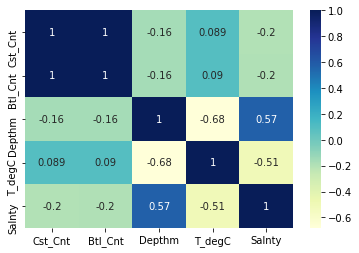

In [5]:
hm = sns.heatmap(df.corr(), cmap = "YlGnBu", annot= True)

In [6]:
df2 = df[['Salnty','T_degC']] # Water Temperature is dependent variable, Salinity is independent variable
df2 = df2[:][:1000] 

In [7]:
df2.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [8]:
df2.drop_duplicates(subset=['Salnty','T_degC'])

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
995,34.040,7.22
996,34.040,6.58
997,34.049,6.44
998,34.113,5.85


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputer.fit(df2)
df2 = imputer.transform(df2)


In [10]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df2 = Scaler.fit_transform(df2)
df2[5:]

array([[-0.43570713,  0.62784363],
       [-0.41802309,  0.62784363],
       [-0.44946138,  0.56298631],
       ...,
       [ 0.77859665, -0.61062247],
       [ 0.90434979, -0.79284067],
       [ 0.99669976, -0.87005178]])

In [11]:
x = df2[:,0:1].reshape(-1,1)
y = df2[:,1]

Text(0, 0.5, 'Temp')

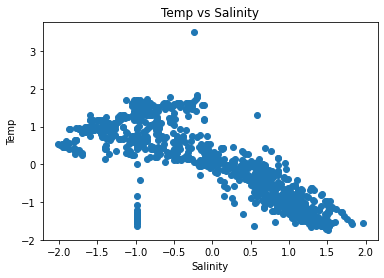

In [12]:
plt.scatter(x,y)
plt.title("Temp vs Salinity")
plt.xlabel("Salinity")
plt.ylabel("Temp")

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [15]:
pred_data = lr.predict(x_test)

Text(0, 0.5, 'Temp')

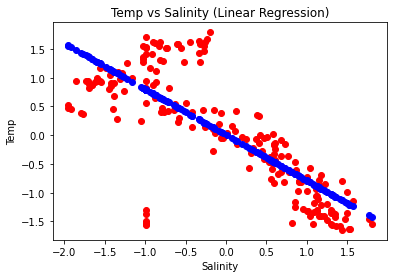

In [20]:
plt.scatter(x_test,y_test,color="red")
plt.scatter(x_test, pred_data, color="blue")
plt.title("Temp vs Salinity (Linear Regression)")
plt.xlabel("Salinity")
plt.ylabel("Temp")

In [21]:
r_square = lr.score(x_test,y_test)
print(r_square)

0.6032832083927516
